In [3]:
import os
os.chdir('/content/drive/MyDrive/Kmean Clustring')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
plt.style.use('ggplot')

In [6]:
from sklearn.cluster import KMeans

# **Data Set Loading**

In [7]:
# !kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# import zipfile
ref = zipfile.ZipFile('brazilian-ecommerce.zip')
ref.extractall('./data')
ref.close()

In [8]:
ls

brazilian-ecommerce.zip  data/  Untitled0.ipynb


In [10]:
customers_dataset = pd.read_csv('./data/olist_customers_dataset.csv')
orders_dataset = pd.read_csv('./data/olist_orders_dataset.csv')
order_items_dataset = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv('./data/olist_order_payments_dataset.csv')
sellers_dataset = pd.read_csv('./data/olist_sellers_dataset.csv')
products_dataset = pd.read_csv('./data/olist_products_dataset.csv')
order_reviews_dataset = pd.read_csv('./data/olist_order_reviews_dataset.csv')

In [11]:
customers_dataset.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [12]:
orders_dataset.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [13]:
order_items_dataset.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [14]:
order_payments_dataset.head(2)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [15]:
sellers_dataset.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [16]:
products_dataset.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [17]:
order_reviews_dataset.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [18]:
file_paths = {
    'customers': './data/olist_customers_dataset.csv',
    'orders': './data/olist_orders_dataset.csv',
    'order_items': './data/olist_order_items_dataset.csv',
    'order_payments': './data/olist_order_payments_dataset.csv',
    'sellers': './data/olist_sellers_dataset.csv',
    'products': './data/olist_products_dataset.csv',
    'order_reviews': './data/olist_order_reviews_dataset.csv'
}

In [19]:
dataset = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [20]:
df = dataset['customers'].merge(dataset['orders'],on='customer_id',how='inner')\
    .merge(dataset['order_items'],on='order_id',how='inner')\
    .merge(dataset['order_payments'],on='order_id',how='inner')\
    .merge(dataset['sellers'],on='seller_id',how='inner')\
    .merge(dataset['products'],on='product_id',how='inner')\
    .merge(dataset['order_reviews'],on='order_id',how='inner')

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24


In [21]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [22]:
df.shape

(117329, 39)

In [23]:
df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1235


In [24]:
df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000
mean,35060.118112,1.194121,120.524349,20.027514,1.094452,2.940151,172.062565,24450.781955,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,4.031467
std,29849.496175,0.684225,182.944843,15.828077,0.731174,2.775370,265.388194,27582.364358,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,1.387927
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,11250.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.750000,6429.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,24240.000000,1.000000,74.900000,16.280000,1.000000,2.000000,108.100000,13660.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,58770.000000,1.000000,134.900000,21.180000,1.000000,4.000000,189.060000,28035.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


<Axes: >

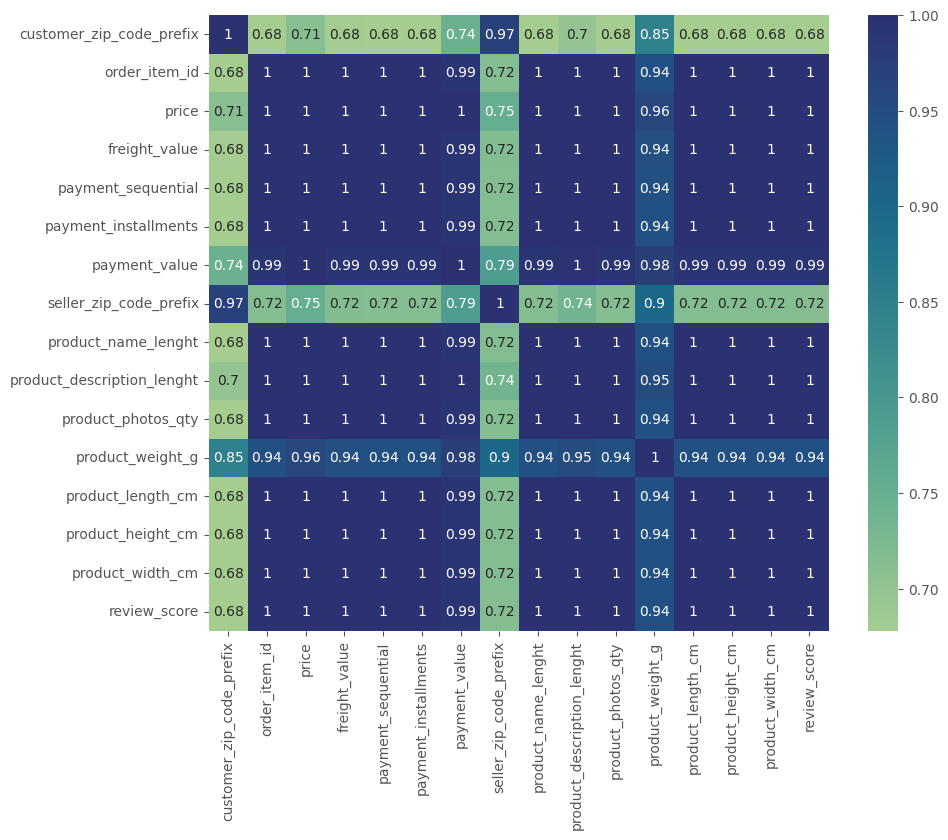

In [25]:
plt.figure(figsize=(10,8))
corr = df.describe().corr()
sns.heatmap(corr,annot=True,cmap="crest")

In [54]:
columns = ['customer_city', 'customer_state', 'order_status',
        'price', 'freight_value','payment_sequential', 'payment_installments', 'payment_type',
       'payment_value','seller_city','seller_state',
      'review_score']
data = df[columns]

In [55]:
data.shape

(117329, 12)

In [56]:
data = data[:30000]

In [57]:
data.shape

(30000, 12)

In [58]:
data.isnull().sum()

,0
customer_city,0
customer_state,0
order_status,0
price,0
freight_value,0
payment_sequential,0
payment_installments,0
payment_type,0
payment_value,0
seller_city,0


In [59]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [83]:
num_cat = ['price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score']
text_cat = ['customer_city', 'customer_state', 'order_status', 'payment_type', 'seller_city', 'seller_state']

# Create a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cat),
    ('cat', OneHotEncoder(), text_cat)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [84]:
transofrmed_data = pipeline.fit_transform(data)
transofrmed_data

<30000x2683 sparse matrix of type '<class 'numpy.float64'>'
	with 360000 stored elements in Compressed Sparse Row format>

In [87]:
df_prepared = transofrmed_data.toarray()

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df_reduced = pca.fit_transform(df_prepared)
df_reduced.shape

(30000, 10)

In [89]:
from sklearn.cluster import KMeans

In [90]:
wcss = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i,init='k-means++')
    kmean.fit(df_reduced)
    wcss.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

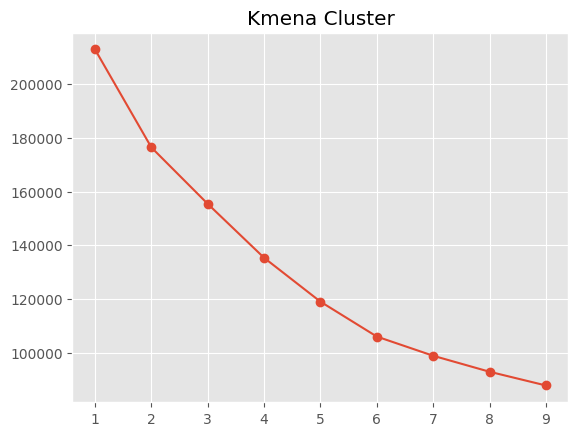

In [92]:
plt.plot(range(1,10),wcss,marker = 'o')
plt.title('Kmena Cluster')
plt.show()

In [94]:
!pip install kneed
from kneed import KneeLocator

In [96]:
kl = KneeLocator(range(1,10),wcss,curve='convex',direction="decreasing")

In [97]:
kl.elbow

5

In [98]:
from sklearn.metrics import silhouette_score

In [99]:
silhouette = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k,init="k-means++")
    kmean.fit(df_reduced)
    score = silhouette_score(df_reduced,kmean.labels_)
    silhouette.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

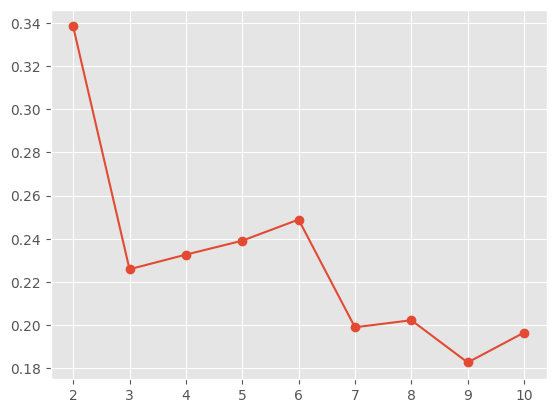

In [100]:
plt.plot(range(2,11),silhouette,marker = "o")